# 2-a:
 
the question is looking for chance of most voted numbers being the real answer if a scenario is
happened which is P(chance of 1 winning|scenario) for simplicity lets  call chance of 1 winning, 1. according to bayes that equals to <br/>
P(scenario|1)*P(1)/P(scenario) <br/>
P(1)=P(0)= 1/2 <br/>
P(scenario|1)= (number of people) choose (number of ones) * (p**number of ones) * ((1-p) ** (number of zeros))<br/>
P(scenario) =  P(scenario|1) * P(1) + P(scenario|0) * P(0) <br/>
at p=0.5 the chance of most voted being the answer is always 0.5 and the hgiher the p the higher chance the mosted voted number is the real answer

In [1]:
import numpy as np


def bayes(p,numof1,numof0,):

    if numof1 > numof0:
        bigger=numof1
        smaller=numof0
    else:
        bigger=numof0
        smaller=numof1

    prior=0.5
    likelihood_of_bigger=(p**bigger)*((1-p)**smaller)
    likelihood_of_smaller=(p**smaller)*((1-p)**bigger)
    evidence=0.5*likelihood_of_bigger+0.5*likelihood_of_smaller
    return prior*likelihood_of_bigger/evidence


print(bayes(0.7,8,4))
print(bayes(0.7,10,2))
print(bayes(0.3,8,4))
print(bayes(0.5,9,3))
print(bayes(0.5,5,7))


0.967365028203062
0.9988631799564817
0.032634971796937945
0.5
0.5


 # 2-b:
  here we run simulations,basically we do the voting n times and count the number of times the good guys won(when one got  more votes) and after that n times we increase p little by little to see the effect of p 

[0.0, 0.0, 0.0036, 0.037, 0.1641, 0.3873, 0.6695, 0.8884, 0.9804, 0.9992, 1.0]


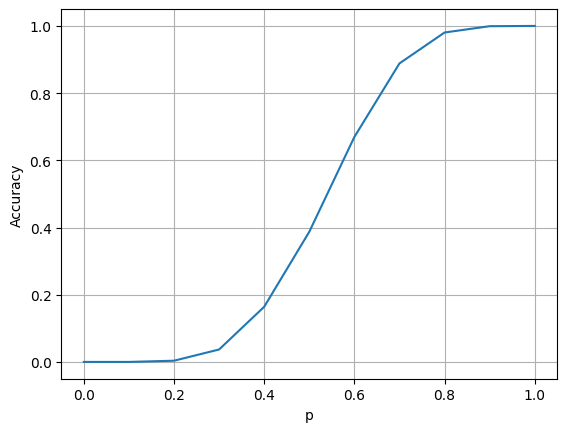

In [2]:
import numpy as np
from random import randint

import matplotlib.pyplot as plt


def vote(p):
    num=randint(1,10)
    if num<=p*10:
        return 1
    else:
        return 0


def num_of_one(n,p):
    ones=0
    for i in range(n):
        if(vote(p)==1):
            ones+=1
    return ones

def simulate(p_range,n,num_of_simulations):
    accuracies=[]

    for p in p_range:
        correct=0
        for i in range(num_of_simulations):
            ones=num_of_one(n,p)
            if ones > n-ones:
                correct+=1
        accuracy=correct/num_of_simulations
        accuracies.append(accuracy)
    return accuracies







p_range=np.arange(0 , 1.1 ,0.1)
accuracies=simulate(p_range,12,10000)
print(accuracies)
plt.plot(p_range, accuracies)
plt.xlabel('p')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend
plt.show()


# 2-c:
 the result of the simulation in part b shows that around p=0.9 the accuracy will be nearly 1

 # 2-d:
  first a  50 by 10 numpy array is made, then n is increased  starting from one to fifty and  simulations were done like in the part b and the results were shown on a heatmap

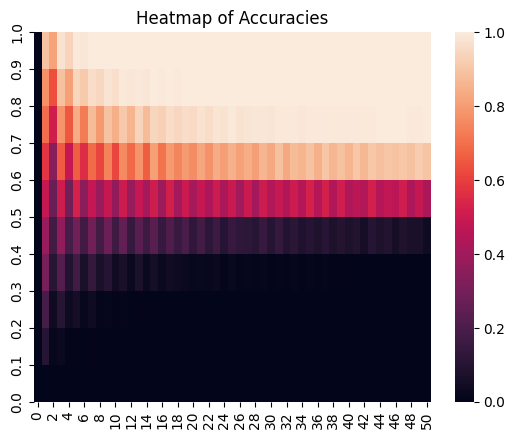

In [15]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


p_range = np.round(np.arange(0, 1.1, 0.1), 1)
heatmap_data = np.zeros((10, 51))


for j in range(51):
    accuracies = simulate(p_range, j, 1000)
    for i in range(1,10):
        heatmap_data[i, j] = accuracies[i]


sns.heatmap(heatmap_data)

plt.title('Heatmap of Accuracies')

plt.yticks(ticks=np.arange(len(p_range)), labels=np.round(p_range, 1)) 
plt.gca().invert_yaxis()
plt.show()


# 3-a:
 preprocess data by tokenizing then  removing punctuation,upper case letters and stopwords and at the end adding them back together

In [2]:
import numpy as np
import pandas as pd
import nltk
import string

def preprocess_text(text):
    text=str(text)
    tokens = nltk.word_tokenize(text)
    stopwords = nltk.corpus.stopwords.words("english")
    tokens = [token for token in tokens if token not in string.punctuation]
    #removing stop words
    tokens = [token for token in tokens if token.lower() not in stopwords]
    return ' '.join(tokens)


data = pd.read_csv('emails.csv')
data["clean_text"]=data["text"].apply(preprocess_text)

# 3-b:
 data is splitted into four parts X and y train which are the emails and their status(spam or legit) which will be used to create a bag of word and used to guess the label of test emails

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



X=data["clean_text"]
y=data["spam"]
X_train, X_test, y_train, y_test = train_test_split(X,y , random_state=552,test_size=0.2, shuffle=True)



# 3-c:
 two dictonaries, spam and legit were made , each unique word was added as key and the count of each  word corresponding to their labels was added as the word's value

In [5]:
spam_dict = {}
legit_dict = {}

# Laplace smoothing constant
laplace_smoothing = 1
spam_count = 0
legit_count = 0
spam_word_count = 0
legit_word_count = 0

#Initialize dictionaries with Laplace smoothing
for sentence, label in zip(X_train, y_train):
    words = sentence.split()

    for word in words:
        if word not in spam_dict:
            spam_dict[word] = laplace_smoothing
        if word not in legit_dict:
            legit_dict[word] = laplace_smoothing

#Count occurrences of each word
for sentence, label in zip(X_train, y_train):
    words = sentence.split()

    if label == 1:  # Spam case
        spam_count += 1
        for word in words:
            spam_dict[word] += 1
            spam_word_count += 1
    else:  # Legit case
        legit_count += 1
        for word in words:
            legit_dict[word] += 1
            legit_word_count += 1
print(legit_word_count)
print(spam_word_count)

576584
139697


: 

# 3-4:
calculating bayes: <br/> 
P(xi|y=1)= number of times xi has appeared in spam emails in total/ number of spam words <br/>
p(y=1)= number of spam emails/total number of emails

In [14]:
import math
def bayes_one(word):
    return spam_dict[word]/(spam_word_count)

def bayes_zero(word):
     return legit_dict[word]/(legit_word_count)



#calculating y without using log
y_pred=[]
for email in X_test:
    email_words=email.split()
    chance_of_1=1
    chance_of_0=1
    for word in email_words:
        if word not in legit_dict.keys():
            legit_dict[word]=laplace_smoothing
        if word not in spam_dict.keys():
            spam_dict[word]=laplace_smoothing
        chance_of_1*= bayes_one(word)
        chance_of_0*= bayes_zero(word)
    chance_of_1*=spam_count/(spam_count+legit_count)
    chance_of_0*=legit_count/(spam_count+legit_count)
    if chance_of_1>chance_of_0:
        y_pred.append(1)
    else:
        y_pred.append(0)


#calculating y with using log
y_pred_log=[]
for email in X_test:
    email_words=email.split()
    chance_of_1=1
    chance_of_0=1
    for word in email_words:
        if word not in legit_dict.keys():
            legit_dict[word]=laplace_smoothing
        if word not in spam_dict.keys():
            spam_dict[word]=laplace_smoothing
        chance_of_1+= math.log(bayes_one(word))
        chance_of_0+= math.log(bayes_zero(word))
    chance_of_1+=math.log(spam_count/(spam_count+legit_count))
    chance_of_0+=math.log(legit_count/(spam_count+legit_count))
    if chance_of_1>chance_of_0:
        y_pred_log.append(1)
    else:
        y_pred_log.append(0)









accuracy = accuracy_score(y_test, y_pred)
accuracy_log = accuracy_score(y_test, y_pred_log)
print(f'Accuracy: {accuracy}')
print(f'Accuracy with log: {accuracy_log}')

Accuracy: 0.9083769633507853
Accuracy with log: 0.9808027923211169


# Questions 
## 1:
if a word is not present in BoW that causes the probability of one side or both sides to become zero which might mess up the calculations. laplace smoothing is commonly used in this situation, it is done by adding an small amount to unseen words(also adding it to seen words to balance out the effect)
## 2:
when dealing with large of amount of words in an email the probabilities will be very close to zero which might cause underflow, by using a  logarithmic transformation you are essentially changing the range of numbers that can occur from 0 to 1 , to -inf to 0 and also instead of multiplying them you are adding them which will reduce the chance of under or over flow.
## 3:
stop words like "is","and","the" etc are used a lot in english regardless of whether the email is spam or not if not removed they might act as some kind of noise in the calculations. by removing them when preproccesing we can increase the accuracy 